In [185]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [186]:
df = pd.read_csv("winequality.csv")

In [187]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [188]:
#  1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
# Inspeccion de datos
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [189]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [190]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [191]:
df.shape

(1599, 12)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


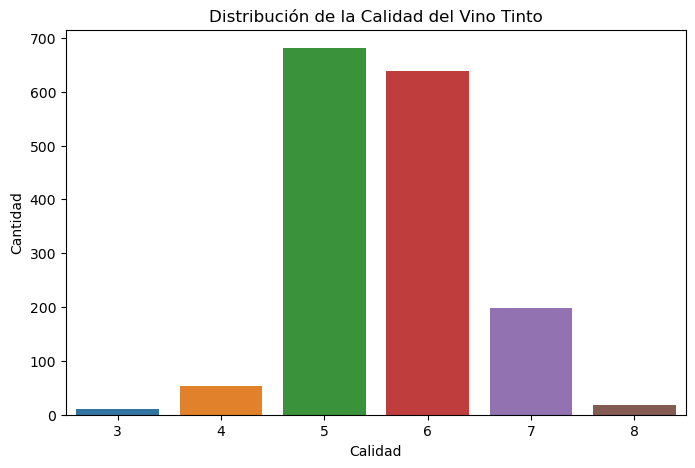

In [193]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino Tinto')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_13264\190437155.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', False):
D:\Programas\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

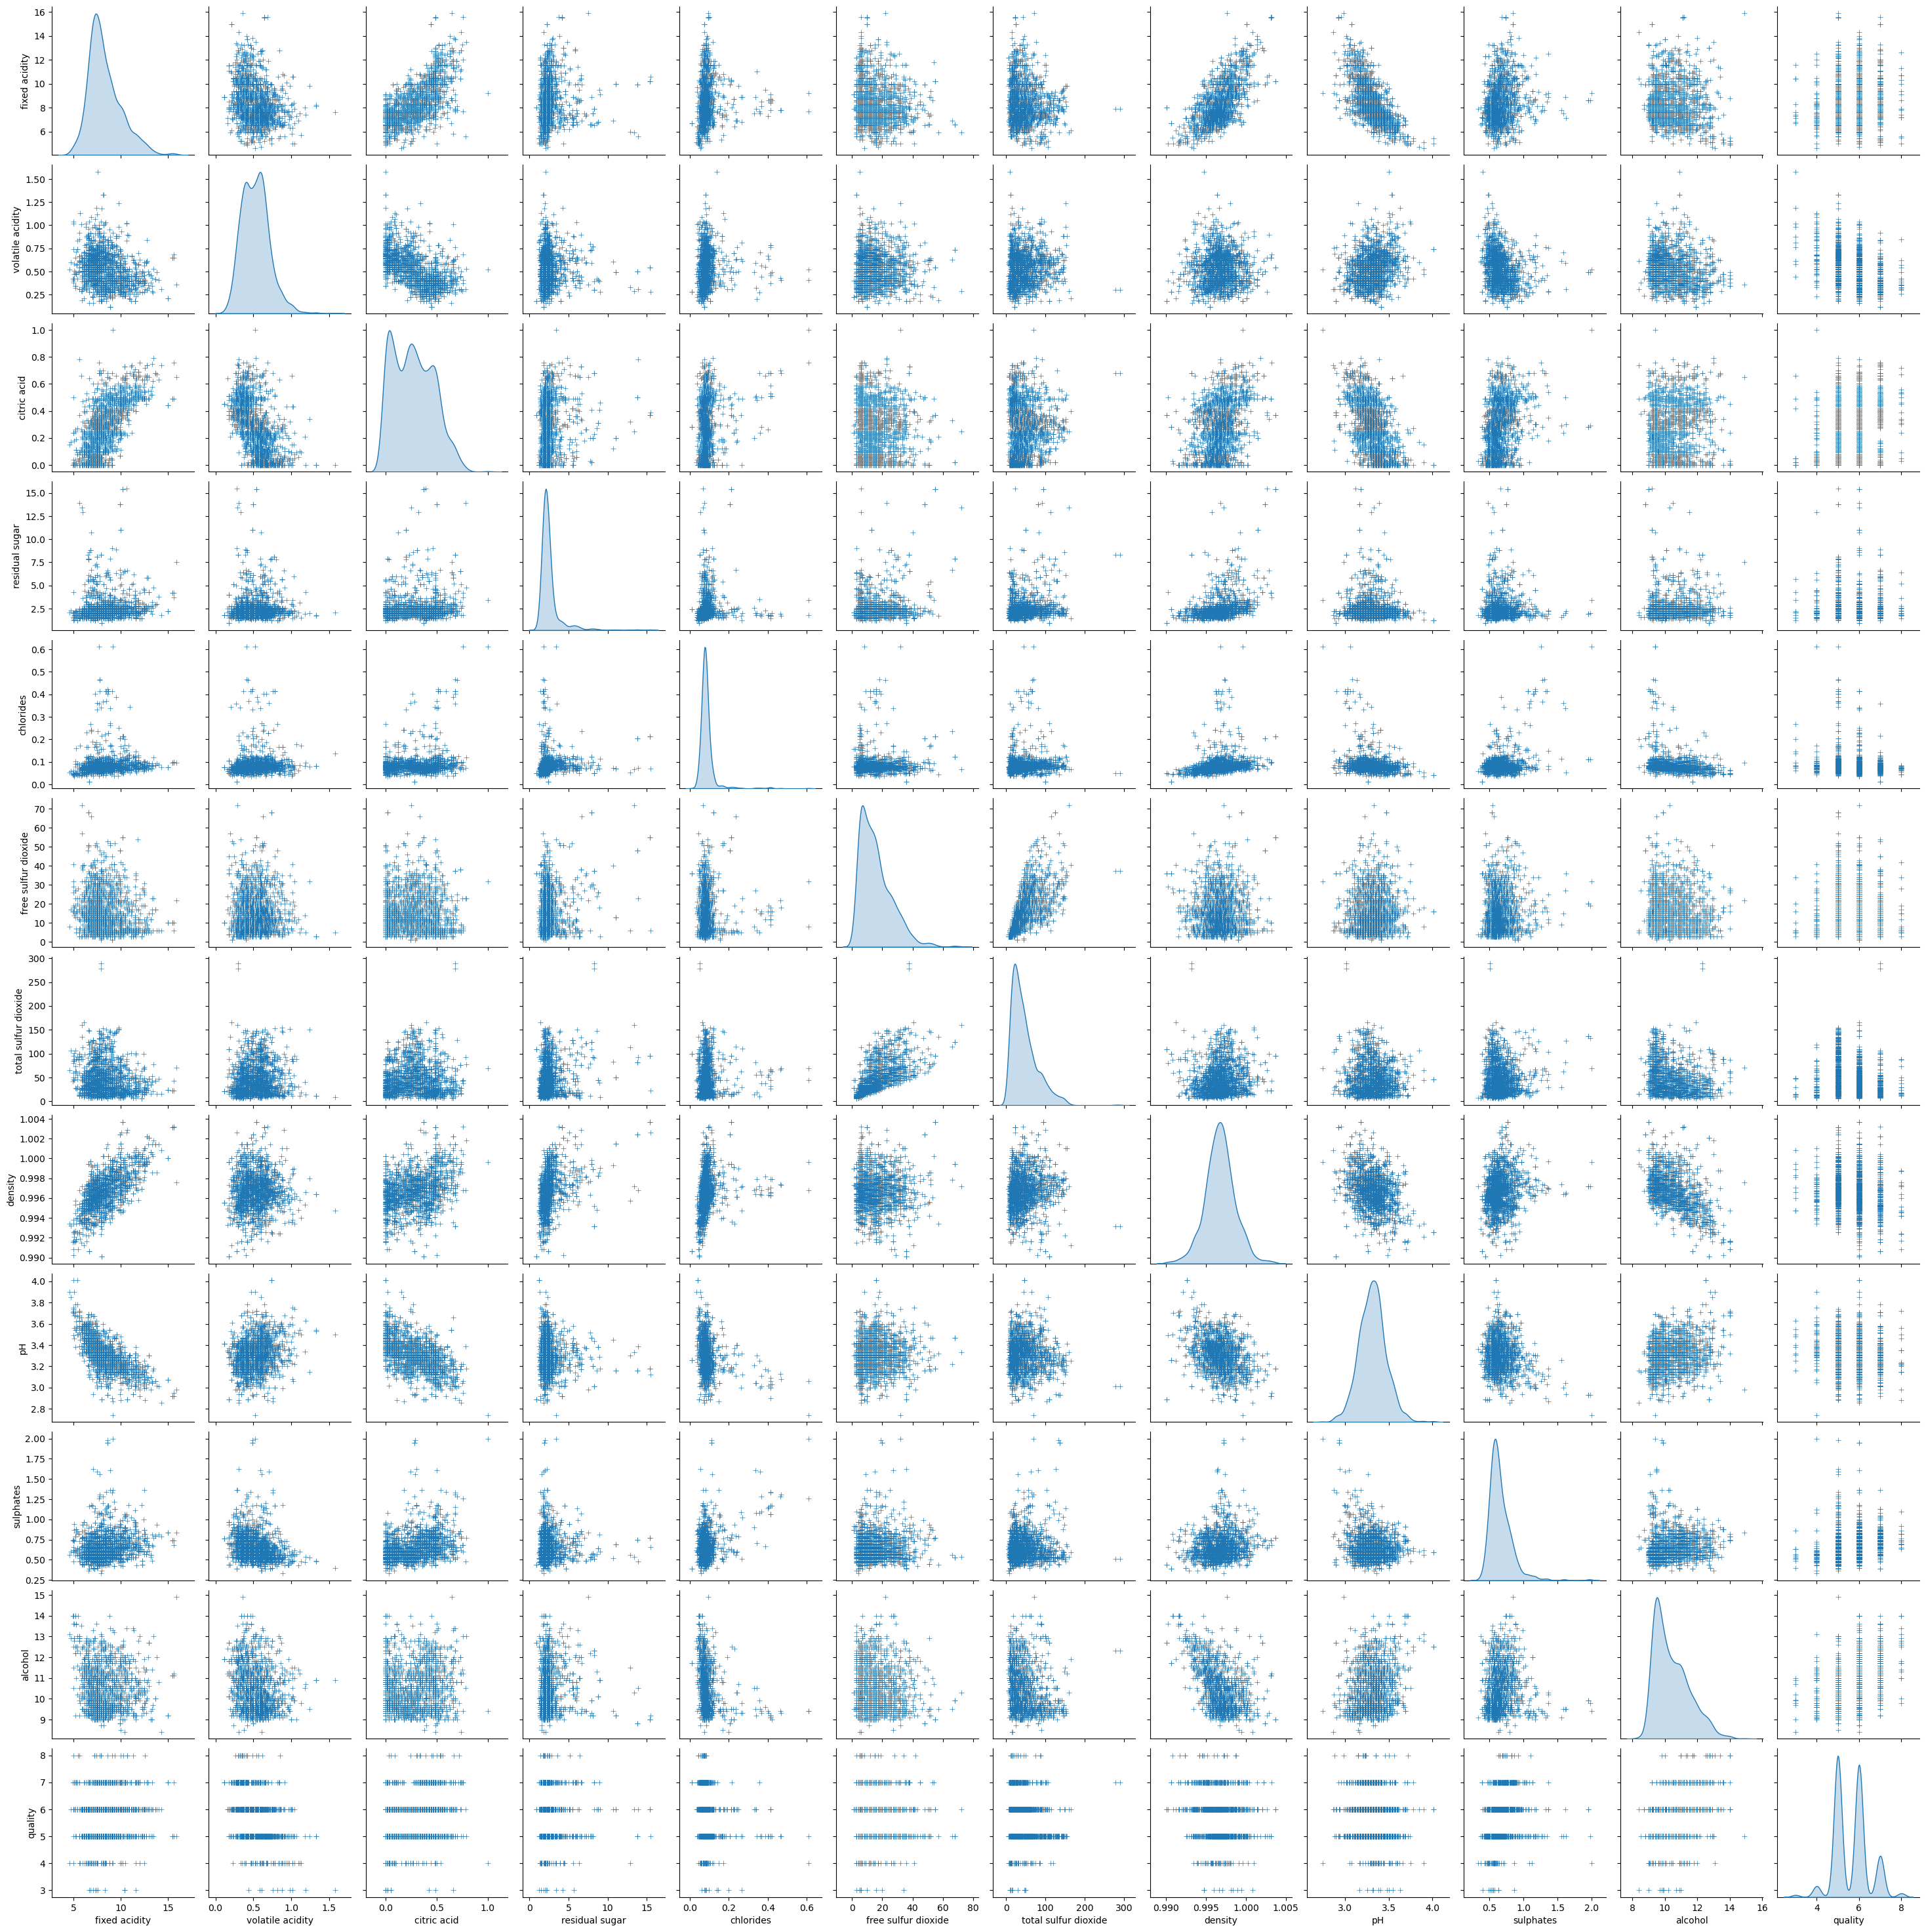

In [194]:
with pd.option_context('mode.use_inf_as_na', False):
    sns.pairplot(df, diag_kind='kde', markers='+')
plt.show()

In [195]:
# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
print("Valores faltantes:")
print(df.isnull().sum())

Valores faltantes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [196]:
# Identificación de datos atípicos

import numpy as np

def detect_outliers(df, features):
    outliers = []
    for feature in features:
        mean = np.mean(df[feature])
        std = np.std(df[feature])
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers.extend(feature_outliers.index.tolist())
    return list(set(outliers))

outliers_indices = detect_outliers(df, df.columns)
print("Indices de datos atípicos:")
print(outliers_indices)

Indices de datos atípicos:
[515, 517, 13, 14, 15, 17, 1043, 19, 1558, 1051, 544, 33, 1570, 38, 1574, 554, 555, 42, 557, 45, 1071, 43, 1074, 1589, 1079, 568, 1081, 57, 584, 588, 591, 81, 595, 83, 86, 1111, 88, 1114, 91, 92, 95, 608, 614, 106, 1131, 109, 120, 636, 126, 127, 639, 1154, 649, 651, 652, 1165, 142, 144, 147, 151, 1175, 672, 1186, 163, 164, 169, 684, 690, 692, 181, 695, 199, 1231, 1235, 724, 723, 730, 1244, 226, 1260, 240, 754, 243, 244, 1269, 1270, 258, 776, 777, 1288, 1289, 1295, 1296, 274, 1299, 1300, 281, 795, 1312, 291, 1316, 1319, 1321, 821, 832, 324, 325, 836, 837, 1358, 339, 340, 1367, 1370, 347, 1372, 1374, 354, 374, 889, 381, 899, 391, 396, 911, 400, 917, 1434, 923, 1435, 925, 926, 442, 1469, 1474, 451, 1476, 1478, 459, 467, 1493, 982, 1496, 480, 1505, 494, 1017, 1018]


In [197]:
# Eliminar los datos atípicos

df_cleaned = df.drop(outliers_indices)

In [198]:
# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol', 'quality']

In [199]:
selected_features = df[features]

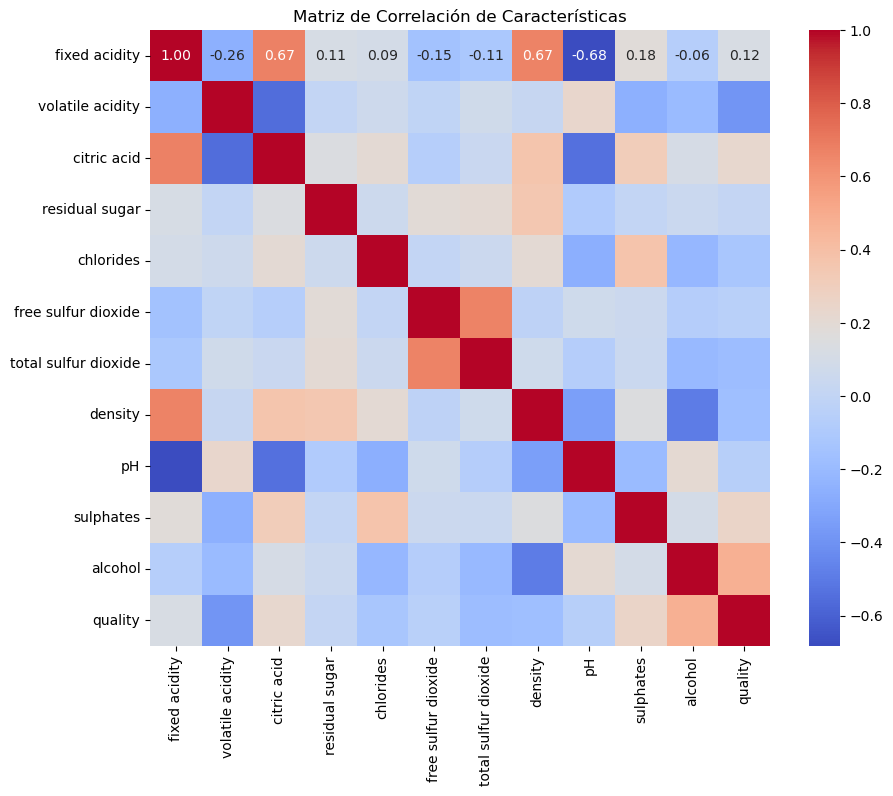

In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Características")
plt.show()

In [201]:
# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [203]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
model = LogisticRegression(max_iter=2000, solver='saga')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [205]:
from sklearn.metrics import classification_report, confusion_matrix

In [206]:
X_test_array = X_test.to_numpy()

In [207]:
y_pred = model.predict(X_test_array)

In [208]:
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.45      0.80      0.57       130
           6       0.62      0.04      0.07       132
           7       0.25      0.48      0.33        42
           8       1.00      0.00      0.00         5

    accuracy                           0.40       320
   macro avg       0.72      0.22      0.16       320
weighted avg       0.52      0.40      0.31       320

[[  0   0   0   0   1   0]
 [  0   0   5   0   5   0]
 [  0   0 104   2  24   0]
 [  0   0  99   5  28   0]
 [  0   0  21   1  20   0]
 [  0   0   3   0   2   0]]


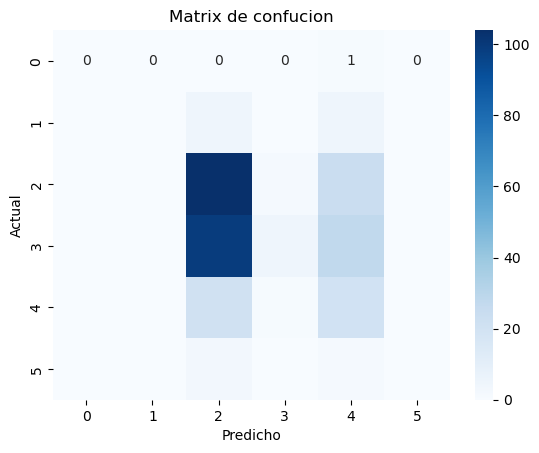

In [209]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matrix de confucion')
plt.show()

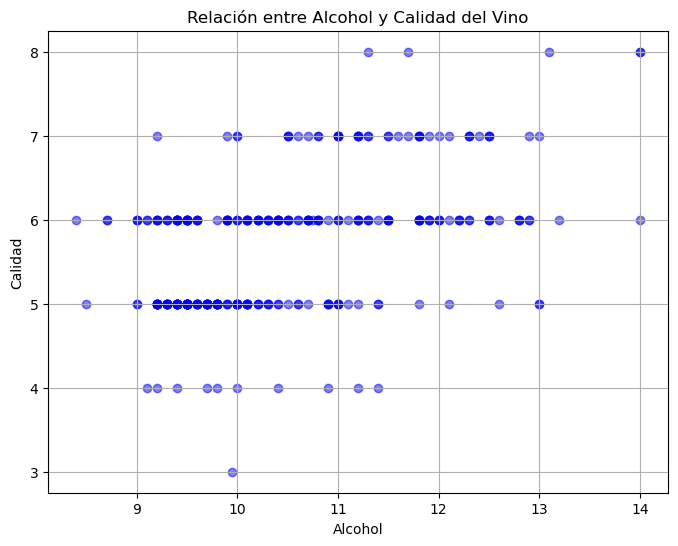

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['alcohol'], y_test, color='blue', alpha=0.5)
plt.title('Relación entre Alcohol y Calidad del Vino')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.grid(True)
plt.show()

D:\Programas\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


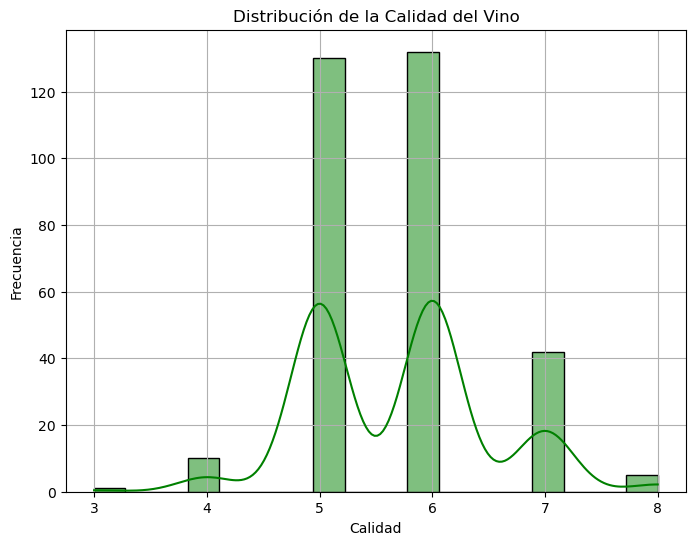

In [213]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True, color='green')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()